In [ ]:
# 🧠 Snake RL Evaluation Analysis
# ===============================
# This notebook compares PPO vs A2C models across
# both personas: survivor and hunter.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ---------------------------
# 📂 Configuration
# ---------------------------
# Make sure paths are correct no matter where the notebook runs
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if not os.path.exists(os.path.join(ROOT_DIR, "logs/snake/eval")):
    # fallback: if we're already in project root, don't go up
    ROOT_DIR = os.getcwd()

print("📁 Current working directory:", os.getcwd())
print("🔍 Using root directory:", ROOT_DIR)

EVAL_DIR = os.path.join(ROOT_DIR, "logs/snake/eval")
PLOT_DIR = os.path.join(ROOT_DIR, "plots/snake")
os.makedirs(PLOT_DIR, exist_ok=True)

📁 Current working directory: d:\4th year\fallSem\Topics in CS I\sokoban-assgn\notebooks
🔍 Using root directory: d:\4th year\fallSem\Topics in CS I\sokoban-assgn


In [7]:

# ---------------------------
# 📊 Load evaluation data
# ---------------------------
csv_files = [os.path.join(EVAL_DIR, f) for f in os.listdir(EVAL_DIR) if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError(f"No eval CSVs found in {EVAL_DIR}. Please run eval_snake.py first.")

print("Found evaluation files:")
for f in csv_files:
    print(" -", f)

dfs = []
for path in csv_files:
    df = pd.read_csv(path)
    df["filename"] = os.path.basename(path)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
print("\n✅ Combined dataset shape:", data.shape)
display(data.head())


Found evaluation files:
 - d:\4th year\fallSem\Topics in CS I\sokoban-assgn\logs/snake/eval\a2c_snake_hunter_eval.csv
 - d:\4th year\fallSem\Topics in CS I\sokoban-assgn\logs/snake/eval\a2c_snake_survivor_eval.csv
 - d:\4th year\fallSem\Topics in CS I\sokoban-assgn\logs/snake/eval\ppo_snake_hunter_eval.csv
 - d:\4th year\fallSem\Topics in CS I\sokoban-assgn\logs/snake/eval\ppo_snake_survivor_eval.csv

✅ Combined dataset shape: (200, 6)


,episode,reward,score,steps,mean_reward_per_step,filename
0,hunter,-10.8,0,5,-2.1600,a2c_snake_hunter_eval.csv
1,hunter,-11.0,0,6,-1.8333,a2c_snake_hunter_eval.csv
2,hunter,-11.0,0,6,-1.8333,a2c_snake_hunter_eval.csv
3,hunter,-11.0,0,6,-1.8333,a2c_snake_hunter_eval.csv
4,hunter,4.0,1,6,0.6667,a2c_snake_hunter_eval.csv


In [9]:
# ---------------------------
# 📈 Compute summary stats (adapted for your dataset)
# ---------------------------

# Extract 'algo' and 'persona' from filename pattern like "ppo_snake_hunter_eval.csv"
data["algo"] = data["filename"].apply(lambda x: x.split("_")[0])        # e.g. "ppo" or "a2c"
data["persona"] = data["filename"].apply(lambda x: x.split("_")[2])     # e.g. "hunter" or "survivor"

# Compute summary statistics
summary = (
    data.groupby(["algo", "persona"])
    .agg(
        mean_reward=("reward", "mean"),
        std_reward=("reward", "std"),
        mean_score=("score", "mean"),
        mean_steps=("steps", "mean"),
        mean_r_per_step=("mean_reward_per_step", "mean"),
        n_episodes=("episode", "count"),
    )
    .reset_index()
)

print("\n📊 Performance Summary by Algorithm and Persona:")
display(summary)



📊 Performance Summary by Algorithm and Persona:


,algo,persona,mean_reward,std_reward,mean_score,mean_steps,mean_r_per_step,n_episodes
0,a2c,hunter,-9.48400,4.478172,0.10,5.92,-1.691300,50
1,a2c,survivor,231.91016,81.312064,19.02,325.12,0.719694,50
2,ppo,hunter,306.82800,90.820631,26.12,375.86,0.834950,50
3,ppo,survivor,256.55256,79.860756,21.56,200.80,1.294668,50


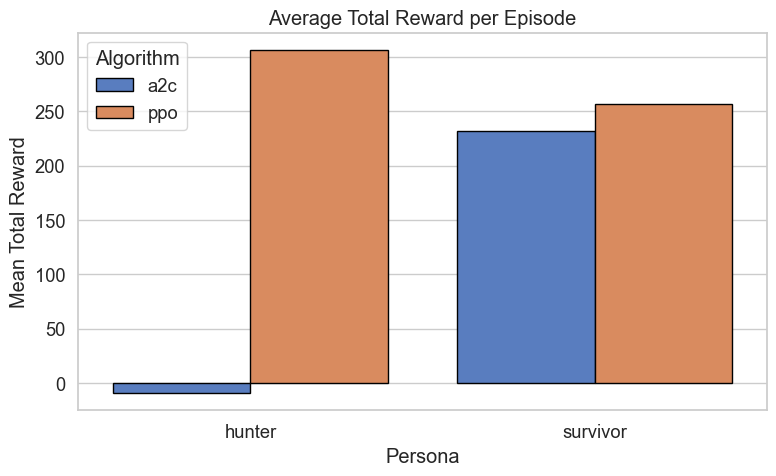

In [10]:
# ---------------------------
# 🎨 Visualization settings
# ---------------------------
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# ---------------------------
# 📉 1. Mean Reward Comparison
# ---------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_reward",
    hue="algo",
    edgecolor="black"
)
plt.title("Average Total Reward per Episode")
plt.ylabel("Mean Total Reward")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "mean_reward_comparison.png"))
plt.show()

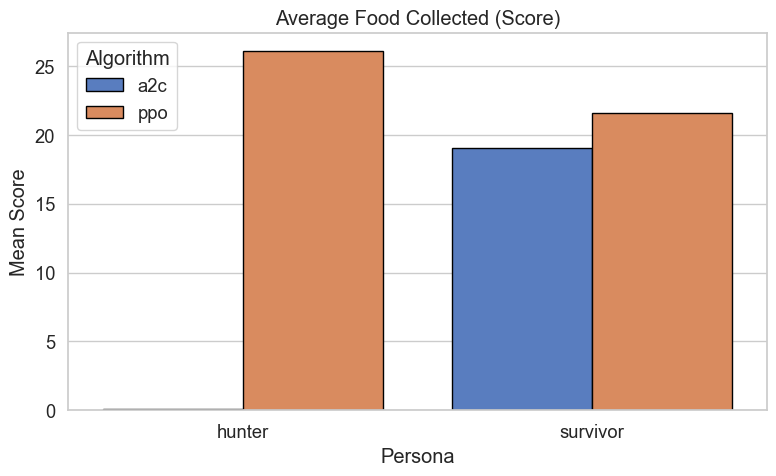

In [11]:
# ---------------------------
# 🍎 2. Mean Score Comparison
# ---------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_score",
    hue="algo",
    edgecolor="black"
)
plt.title("Average Food Collected (Score)")
plt.ylabel("Mean Score")
plt.xlabel("Persona")
plt.legend(title="Algorithm")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "mean_score_comparison.png"))
plt.show()


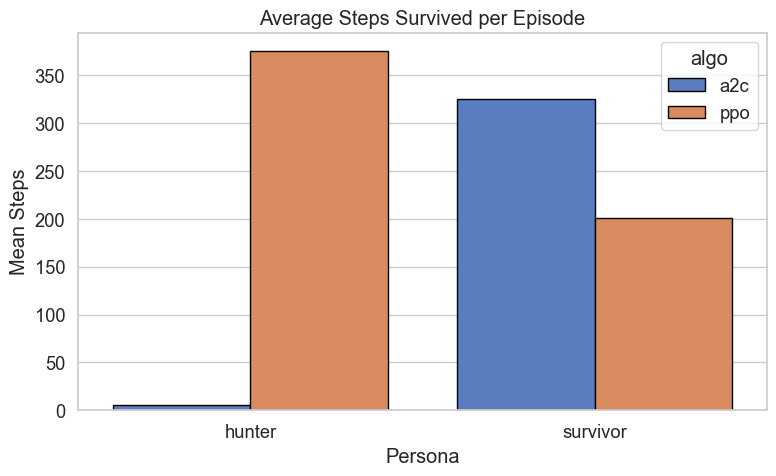

In [12]:
# ---------------------------
# 🕒 3. Steps Survived
# ---------------------------
plt.figure(figsize=(8, 5))
sns.barplot(
    data=summary,
    x="persona",
    y="mean_steps",
    hue="algo",
    edgecolor="black"
)
plt.title("Average Steps Survived per Episode")
plt.ylabel("Mean Steps")
plt.xlabel("Persona")
plt.tight_layout()
plt.savefig(os.path.join(PLOT_DIR, "mean_steps_comparison.png"))
plt.show()

In [14]:
# ---------------------------
# 💬 Insights Summary
# ---------------------------
print("\n🧩 Insights Summary:")
for _, row in summary.iterrows():
    algo, persona = row["algo"], row["persona"]
    print(
        f" - {algo.upper()} ({persona}): "
        f"Reward={row['mean_reward']:.2f}±{row['std_reward']:.2f}, "
        f"Score={row['mean_score']:.2f}, Steps={row['mean_steps']:.0f}"
    )

print(f"\n✅ All plots saved to: {PLOT_DIR}")


🧩 Insights Summary:
 - A2C (hunter): Reward=-9.48±4.48, Score=0.10, Steps=6
 - A2C (survivor): Reward=231.91±81.31, Score=19.02, Steps=325
 - PPO (hunter): Reward=306.83±90.82, Score=26.12, Steps=376
 - PPO (survivor): Reward=256.55±79.86, Score=21.56, Steps=201

✅ All plots saved to: d:\4th year\fallSem\Topics in CS I\sokoban-assgn\plots/snake
